In [6]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

# The Return of the King problem
### A recursive brut force solution

According to the task, on each step we decide in what direction to move along both the Y-axes and the X-axes, making 2 independent samples, where:

1) $p_{up}$ = 0.3 and $p_{down}$ = 0.2

2) $p_{left}$ = 0.2 and $p_{right}$ = 0.4

### Hence there are totally **9** possible "moves" (including no motion, i.e staying on the same spot):
- up: $p_{up} * (1 - p_{left} - p_{right})$
- down: $p_{down} * (1 - p_{left} - p_{right})$
- left: $p_{left} * (1 - p_{up} - p_{down})$
- right: $p_{right} * (1 - p_{up} - p_{down})$
- up-left: $p_{up} * p_{left}$
- up-right: $p_{up} * p_{right}$
- down-left: $p_{down} * p_{left}$
- down-right: $p_{down} * p_{right}$
- stay on the same field: $(1 - p_{left} - p_{right}) * (1 - p_{up} - p_{down})$

(It doesn't really matter what "up" and "down" or "left" and "right" actually is. It only matters that these are opposite directions.)

### Define the probabilities and a list of all possible moves with their corresponding probabilities:

In [7]:
def create_possible_moves(p_up, p_down, p_left, p_right):
    return [
        {
            'p': p_up * (1 - p_left - p_right), # up
            'dx': 0,
            'dy': 1
        },
        {
            'p': p_down * (1 - p_left - p_right), # down
            'dx': 0,
            'dy': -1
        },
        {
            'p': p_left * (1 - p_up - p_down), # left
            'dx': -1,
            'dy': 0
        },
        {
            'p': p_right * (1 - p_up - p_down), # right
            'dx': 1,
            'dy': 0
        },
        {
            'p': p_up * p_left, # up-left
            'dx': -1,
            'dy': 1
        },
        {
            'p': p_up * p_right, # up-right
            'dx': 1,
            'dy': 1
        },
        {
            'p': p_down * p_left, # down-left
            'dx': -1,
            'dy': -1
        },
        {
            'p': p_down * p_right, # down-right
            'dx': 1,
            'dy': -1
        },
        {
            'p': (1 - p_up - p_down) * (1 - p_left - p_right), # stay on the same field
            'dx': 0,
            'dy': 0
        }
    ]

In [8]:
p_up = 0.3
p_down = 0.2
p_left = 0.2
p_right = 0.4

moves = create_possible_moves(p_up, p_down, p_left, p_right)

### Check that the sum of all probabilities is actually 1:

In [9]:
sum([move['p'] for move in moves])

1.0

### Define some contsants and initialize stuff:

In [10]:
def make_step(step_no, x, y, p, routes_all):
    for move in moves:
        if step_no + 1 == N_STEPS:
            routes_all.append(
                {
                    'x': x + move['dx'],
                    'y': y + move['dy'],
                    'p': p * move['p']
                }
            )
        else:
            make_step(step_no + 1, 
                      x + move['dx'], 
                      y + move['dy'], 
                      p * move['p'], 
                      routes_all)

In [11]:
N_STEPS = 5 # the desired number of steps

P_START = 1 # the initial probability

X_START = 0 # start x coordinate
Y_START = 0 # start y coordinate

routes_all = [] # empty routes list

In [12]:
%%time

make_step(0, X_START, Y_START, P_START, routes_all)

CPU times: user 31.2 ms, sys: 7.7 ms, total: 38.9 ms
Wall time: 37.8 ms


In [13]:
if len(routes_all) == pow(len(moves), N_STEPS):
    print('All possible routes checked ({})'. format(len(routes_all)))
else:
    print('Some error occured.')

All possible routes checked (59049)


In [14]:
print('The probability of being on the start field after {} moves is {}.'. format(N_STEPS, 
                                                                                  sum([route['p'] for route in routes_all if route['x'] == 0 and route['y'] == 0])))

The probability of being on the start field after 5 moves is 0.04456576000000016.


### Let's plot a heatmap of the probabilities for all possible fields after N_STEPS steps

In [15]:
def create_route_map(routes_all, n_steps, percent=True):
    route_map = np.zeros((n_steps * 2 + 1, n_steps * 2 + 1))
    for i in range(-n_steps, n_steps + 1):
        for j in range(-n_steps, n_steps + 1):
            if percent:
                route_map[i,j] = np.round(sum([route['p'] for route in routes_all if route['x'] == j and route['y'] == i]) * 100, 2)
            else:
                route_map[i,j] = sum([route['p'] for route in routes_all if route['x'] == j and route['y'] == i])
    return route_map

In [16]:
def plot_route_map(route_map, n_steps):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.imshow(route_map)
    for i in range(-n_steps, n_steps + 1):
        for j in range(-n_steps, n_steps + 1):
            ax.text(x=(i + n_steps - 0.3), y=(j + n_steps), s=str(route_map[i,j]) + '%', color='white')
            #ax.grid(b=True)
    ax.set_xticks(range(n_steps * 2 + 1))
    ax.set_xticklabels([str(n) for n in range(-N_STEPS, N_STEPS + 1)])
    ax.set_yticks(range(n_steps * 2 + 1))
    ax.set_yticklabels([str(n) for n in range(-N_STEPS, N_STEPS + 1)])
    plt.show()

In [17]:
route_map = create_route_map(routes_all, N_STEPS)

print(route_map.sum() / 100) # Check the sum of all proabilities again

1.0002000000000002


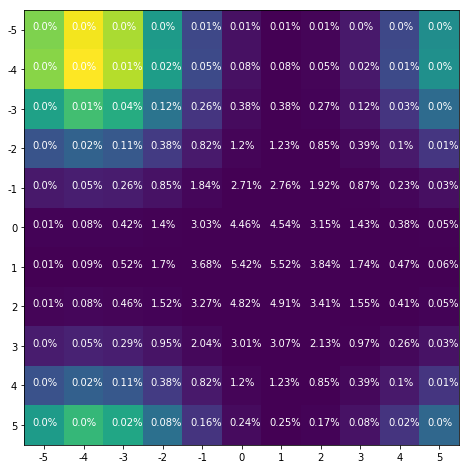

In [18]:
plot_route_map(route_map, N_STEPS)

### Let's compare it with the case when the probability of going in any of the eight directions was the same (p = 0.125)

In [19]:
moves = [
    {
        'p': 0.125, # up
        'dx': 0,
        'dy': 1
    },
    {
        'p': 0.125, # down
        'dx': 0,
        'dy': -1
    },
    {
        'p': 0.125, # left
        'dx': -1,
        'dy': 0
    },
    {
        'p': 0.125, # right
        'dx': 1,
        'dy': 0
    },
    {
        'p': 0.125, # up-left
        'dx': -1,
        'dy': 1
    },
    {
        'p': 0.125, # up-right
        'dx': 1,
        'dy': 1
    },
    {
        'p': 0.125, # down-left
        'dx': -1,
        'dy': -1
    },
    {
        'p': 0.125, # down-right
        'dx': 1,
        'dy': -1
    },
    {
        'p': 0, # stay on the same field
        'dx': 0,
        'dy': 0
    }
]

In [20]:
N_STEPS = 5 # the desired number of steps

P_START = 1 # the initial probability

X_START = 0 # start x coordinate
Y_START = 0 # start y coordinate

routes_all = [] # empty routes list

In [21]:
%%time

make_step(0, X_START, Y_START, P_START, routes_all)

CPU times: user 30 ms, sys: 5.68 ms, total: 35.7 ms
Wall time: 34.9 ms


In [22]:
if len(routes_all) == pow(len(moves), N_STEPS):
    print('All possible routes checked ({})'. format(len(routes_all)))

All possible routes checked (59049)


In [23]:
print('The probability of being on the start field after {} moves is {}.'. format(N_STEPS, 
                                                                                  sum([route['p'] for route in routes_all if route['x'] == 0 and route['y'] == 0])))

The probability of being on the start field after 5 moves is 0.03662109375.


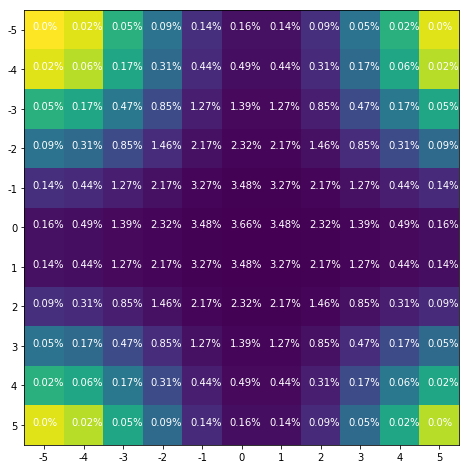

In [24]:
plot_route_map(create_route_map(routes_all, N_STEPS), N_STEPS)